In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils
import pickle

In [2]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [4]:
zarr_files = utils.find_input_paths(directory = '/root/capsule/data', return_file=False, endswith='zarr')
len(zarr_files)

Searching for Zarr directories in /root/capsule/data: 100%|██████████| 1/1 [00:00<00:00, 13231.24it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results: 100%|██████████| 20/20 [00:00<00:00, 352462.52it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy: 100%|██████████| 1/1 [00:00<00:00, 25890.77it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data: 100%|██████████| 1/1 [00:00<00:00, 11305.40it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data/motion_energy_frames.zarr: 100%|██████████| 1/1 [00:00<00:00, 19065.02it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data/motion_energy_frames.za


.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-01_08-59-00_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-12_09-20-11_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-05_09-19-25_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-16_09-17-44_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-22_08-54-38_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directo


Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-29_09-00-58_Face_motion_energy/data/motion_energy_frames.zarr/full_frames: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-29_09-00-58_Face_motion_energy/data/motion_energy_frames.zarr/cropped_frames: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-30_09-11-03_Face_motion_energy: 100%|██████████| 1/1 [00:00<00:00, 23301.69it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-30_09-11-03_Face_motion_energy/data: 100%|██████████| 1/1 [00:00<00:00, 9845.78it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-30_09-11-03_Face_motion_energy/data/motion_energy_frames.zarr: 100%|██████████| 2/2 [00:00<00:00,


.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-30_09-11-03_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-23_09-13-46_Face_motion_energy/data/motion_energy_frames.zarr

.  Found zarr directory: /root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-27_08-51-49_Face_motion_energy/data/motion_energy_frames.zarr


20

In [8]:
import zarr
import json
root_group = zarr.open_group(zarr_files[10], mode='r')
all_metadata = json.loads(root_group.attrs['metadata'])

In [7]:
print(root_group.attrs.asdict()) 


{}


In [2]:
pkl_files

NameError: name 'pkl_files' is not defined

In [37]:
meta_obj = utils.load_pickle_file(pkl_files[0])
zarr_files[0]

'/root/capsule/data/749315_nose_motion_energy/749315_Nose_07085a61-f303-4192-aff4-465d70189cac/motion_energy_frames.zarr'

In [23]:
npz_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.npz', return_dir=False)

array(['/root/capsule/data/749315_nose_motion_energy/749315_Nose_07085a61-f303-4192-aff4-465d70189cac/749315_Nose_07085a61-f303-4192-aff4-465d70189cac.pkl',
       '/root/capsule/data/749315_nose_motion_energy/749315_Nose_25ae01a2-d8f2-4ead-ae66-ffce233fff07/749315_Nose_25ae01a2-d8f2-4ead-ae66-ffce233fff07.pkl',
       '/root/capsule/data/749315_nose_motion_energy/749315_Nose_27d37898-0de8-46c8-90a3-865de5689080/749315_Nose_27d37898-0de8-46c8-90a3-865de5689080.pkl',
       '/root/capsule/data/749315_nose_motion_energy/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a.pkl',
       '/root/capsule/data/749315_nose_motion_energy/749315_Nose_7d7a3652-8dbd-4dc7-ba96-24607f2f5790/749315_Nose_7d7a3652-8dbd-4dc7-ba96-24607f2f5790.pkl'],
      dtype='<U146')

In [24]:
npz_files

['/root/capsule/data/749315_nose_motion_energy/749315_Nose_07085a61-f303-4192-aff4-465d70189cac/749315_Nose_07085a61-f303-4192-aff4-465d70189cac.npz',
 '/root/capsule/data/749315_nose_motion_energy/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a.npz',
 '/root/capsule/data/749315_nose_motion_energy/749315_Nose_25ae01a2-d8f2-4ead-ae66-ffce233fff07/749315_Nose_25ae01a2-d8f2-4ead-ae66-ffce233fff07.npz',
 '/root/capsule/data/749315_nose_motion_energy/749315_Nose_7d7a3652-8dbd-4dc7-ba96-24607f2f5790/749315_Nose_7d7a3652-8dbd-4dc7-ba96-24607f2f5790.npz',
 '/root/capsule/data/749315_nose_motion_energy/749315_Nose_27d37898-0de8-46c8-90a3-865de5689080/749315_Nose_27d37898-0de8-46c8-90a3-865de5689080.npz']

In [6]:
# #load me_pca
# filepath = "/root/capsule/code/tmp_me_pca_notstand_data_stand_masks.pkl"
# me_pca = utils.load_pickle_file(filepath)


In [7]:
from PCAgenerator import PCAgenerator


In [8]:
zarr_path = zarr_files[1]
me_pca = PCAgenerator(zarr_path, crop=True, crop_region=(250, 300,  400, 500), standardize4PCA=False, standardizeMasks=True) 
 
me_pca, post_crop_frames_me = me_pca._apply_pca_to_motion_energy_without_dask()


INFO:PCAgenerator:Metadata loaded successfully.
INFO:PCAgenerator:Loaded motion energy frames with shape (228394, 492, 658)
INFO:PCAgenerator:Processing 228393 frames, starting at frame 1.
Fitting PCA: 100%|█████████▉| 2282/2284 [26:46<00:01,  1.42it/s]
INFO:PCAgenerator:PCA fitting complete.
Transforming PCA:   0%|          | 4/2284 [00:00<01:11, 32.03it/s]

transform last 228201


Transforming PCA: 100%|█████████▉| 2282/2284 [01:18<00:00, 29.09it/s]
INFO:PCAgenerator:PCA transformation complete. Output shape: (228393, 100)


transform last 228201


In [10]:
me_pca._add_spatial_masks(pca_motion_energy, post_crop_frames_me)

INFO:PCAgenerator:Computing spatial masks...
INFO:PCAgenerator:Number of PCA components: 100
INFO:PCAgenerator:Total frames available: 228393
INFO:PCAgenerator:Standardizing PC mask values for plotting.
INFO:PCAgenerator:Processing Principal Component 1...
PC 1: 100%|█████████▉| 2283/2284 [00:14<00:00, 154.35it/s]
INFO:PCAgenerator:Processing Principal Component 2...
PC 2: 100%|█████████▉| 2283/2284 [00:14<00:00, 154.38it/s]
INFO:PCAgenerator:Processing Principal Component 3...
PC 3: 100%|█████████▉| 2283/2284 [00:14<00:00, 154.55it/s]
INFO:PCAgenerator:Spatial masks computation complete.


In [8]:
zarr_files

['/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data/motion_energy_frames.zarr',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-11_08-45-05_Face_motion_energy/data/motion_energy_frames.zarr/full_frames/.zarray',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-01_08-59-00_Face_motion_energy/data/motion_energy_frames.zarr',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-01_08-59-00_Face_motion_energy/data/motion_energy_frames.zarr/full_frames/.zarray',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-12_09-20-11_Face_motion_energy/data/motion_energy_frames.zarr',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-07-12_09-20-11_Face_motion_energy/data/motion_energy_frames.zarr/full_frames/.zarray',
 '/root/capsule/data/Thyme_ME_results/736963_multiplane-ophys_736963_2024-08-05_09-19-25_Face_

In [16]:
me_pca._save_results()

INFO:PCAgenerator:Saving PCA results...
INFO:PCAgenerator:PCA results saved at: /root/capsule/results/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/fit_motion_energy_pca.pkl


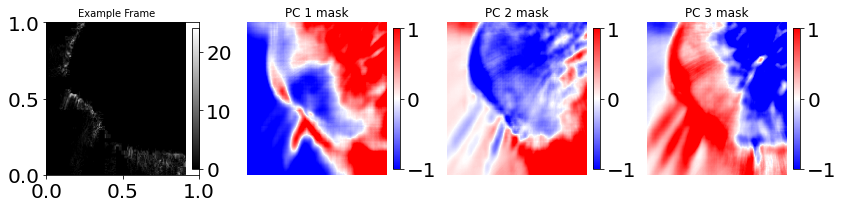

Figure saved at: /root/capsule/results/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/pca_spatial_masks.png
Figure saved at: /root/capsule/results/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/pca_components_traces.png


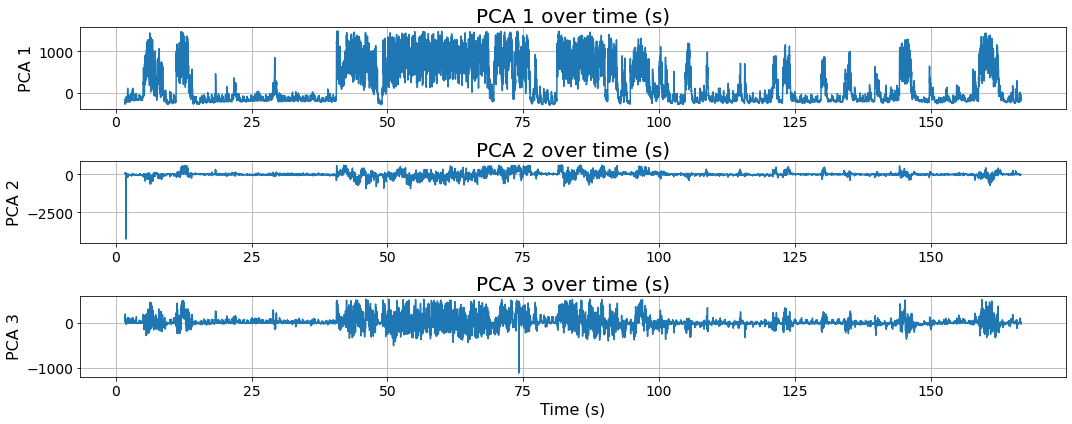

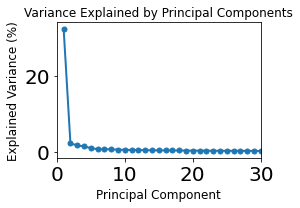

Figure saved at: /root/capsule/results/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/pca_explained_variance.png


NameError: name 'logger' is not defined

In [28]:

#plot and save fig
fig = me_pca._plot_spatial_masks()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'pca_spatial_masks.png', dpi=300, bbox_inches="tight", transparent=False)

fig = me_pca._plot_pca_components_traces()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'pca_components_traces.png', dpi=300, bbox_inches="tight", transparent=False)

fig = me_pca._plot_explained_variance()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'pca_explained_variance.png', dpi=300, bbox_inches="tight", transparent=False)




INFO:PCAgenerator:Plotted array: array1


Figure saved at: /root/capsule/results/749315_Nose_561b876e-e1b0-41a4-a946-644f1d385e5a/motion_energy_trace.png


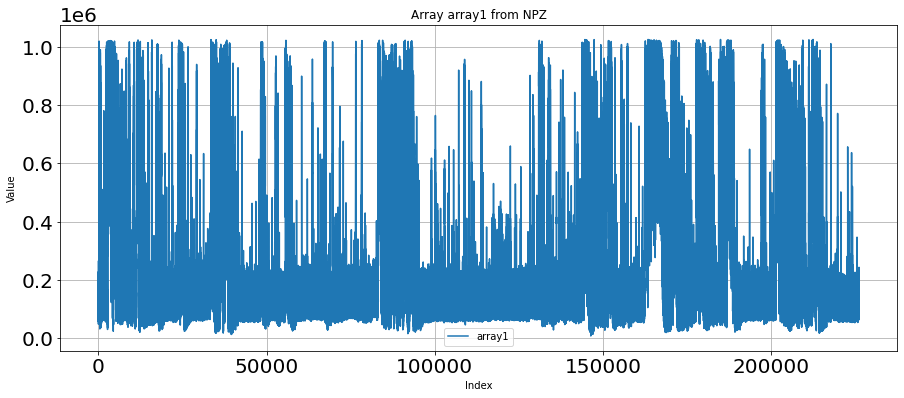

In [34]:
fig = me_pca._plot_motion_energy_trace(npz_files[1])
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'motion_energy_trace.png', dpi=300, bbox_inches="tight", transparent=False)


In [31]:
x = np.load(npz_files[1])

In [32]:
x

In [ ]:
metadata = utils.load_metadata_file(self.video_path.split('behavior-videos')[0])
session_type = metadata['session']['session_type']
data_asset_id = metadata['_id']

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


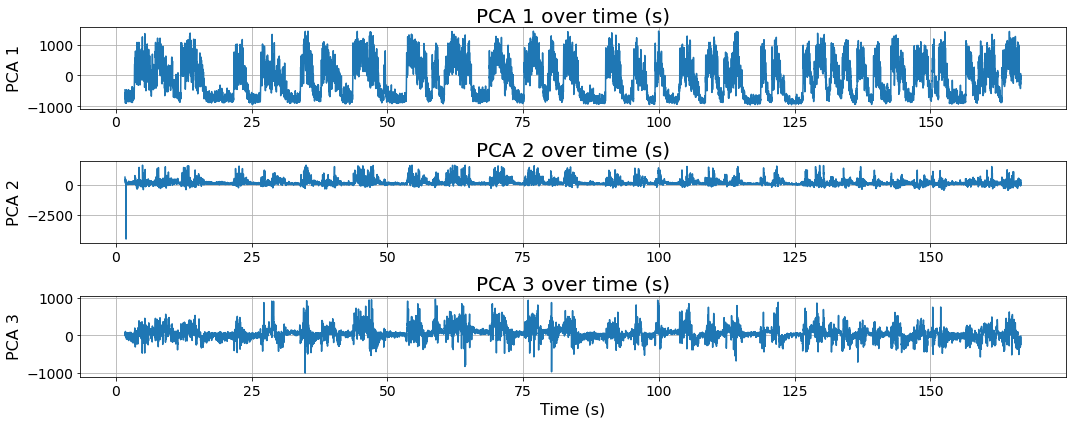

In [33]:
#me_pca._load_metadata()

fig  = me_pca._plot_pca_components_traces()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'pca_traces.npg', dpi=300, bbox_inches="tight", transparent=False)

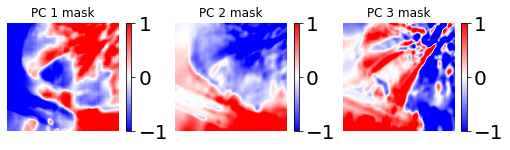

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


In [36]:
fig  = me_pca._plot_spatial_masks()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'masks.npg', dpi=200, bbox_inches="tight", transparent=False)

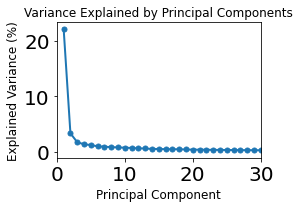

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


In [39]:
#me_pca._load_metadata()

fig  = me_pca._plot_explained_variance()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 've', dpi=300, bbox_inches="tight", transparent=False)

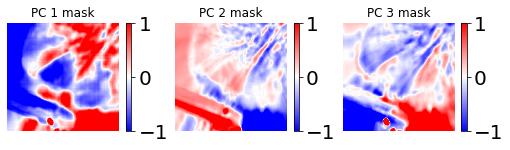

In [16]:

fig = me_pca._plot_spatial_masks()

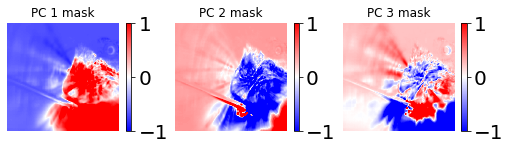

In [15]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

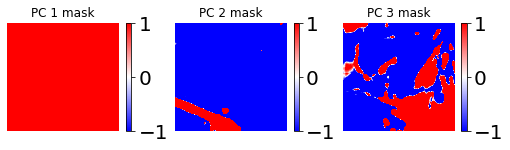

In [ ]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

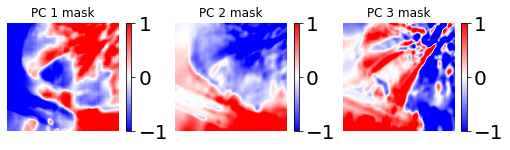

In [ ]:
# not standardized frames, standardized mask
fig = me_pca._plot_spatial_masks()

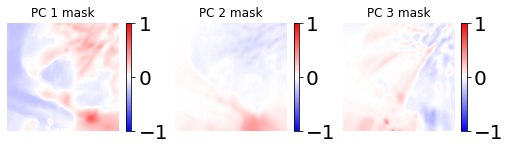

In [ ]:
# not standardized frames, standardized mask (short video)
# could be lighter also due to inclussion of noisy first frame?
fig = me_pca.plot_spatial_masks()

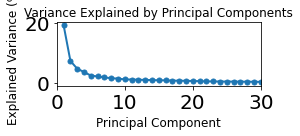

In [18]:
fig = me_pca._plot_explained_variance()

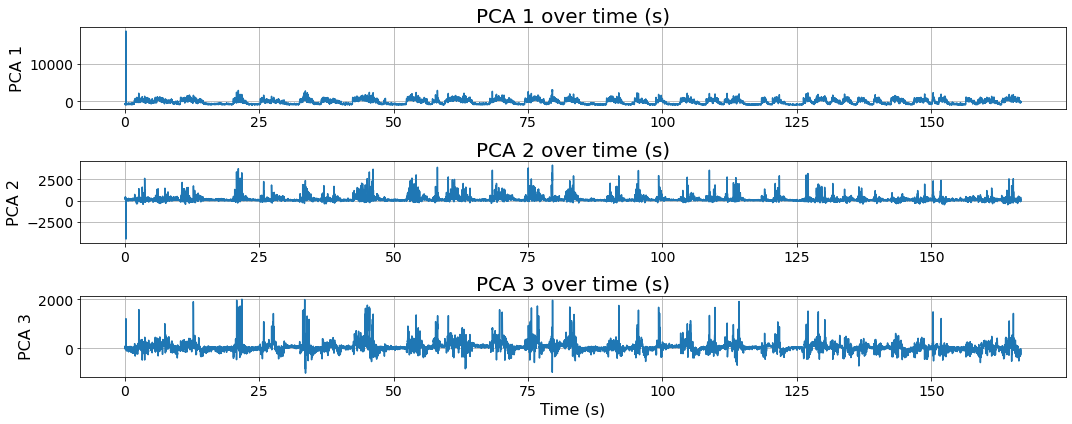

In [34]:
fig =me_pca._plot_pca_components_traces()

In [35]:
me_pca.loaded_metadata

{'video_path': '/root/capsule/data/multiplane-ophys_749315_2024-11-20_14-58-05/behavior-videos/1406189591_Nose_20241120T145749.mp4',
 'fps': 60,
 'chunk_size': 100,
 'width': 658,
 'height': 492,
 'total_frames': 221612,
 'video_info': {'Recording Report Version': '1.0',
  'Acquisition DateTime': '11/20/24 15:59:22',
  'MVR Version': '1.1.7',
  'CameraIndex': 'Camera 4',
  'CameraLabel': 'Nose',
  'CameraID': 'DEV_000F315C24C5',
  'FPS': 60.0024,
  'CameraGain': 5,
  'CustomInitialExposureTime': 4,
  'CustomInitialNumberOfFrames': 10,
  'ExposureTime': 1,
  'ImageDimensions': '658x492',
  'BinningFactors': '1x1',
  'MovieID': 'dd6f0b5e-a792-11ef-904b-ac1f6b3c2dda',
  'VideoOutputFileName': 'C:\\ProgramData\\AIBS_MPE\\mvr\\data\\.\\1406189591_Nose_20241120T145749.mp4',
  'Codec': 'h264_nvenc',
  'FrameID imprint enabled': 'false',
  'ApproximateFileSize': '903036.896 KB',
  'h264': {'CRF': '17', 'Preset': 'medium', 'HardwareAcceleration': 'cuvid'},
  'FFMPEGInputPixelFormat': 'gray',
  